In [1]:
import jieba
with open('ZF2018.txt','r') as f:
    renmin=f.read()
jieba.load_userdict('AIDict.txt')
seg_list=jieba.cut(renmin,cut_all=False)
tf={}
for seg in seg_list:
    if seg in tf:
        tf[seg]+=1
    else:
        tf[seg]=1
ci=list(tf.keys())
with open('stopword.txt','r') as ft:
    stopword=ft.read()
for seg in ci:
    if tf[seg]<5 or len(seg)<2 or seg in stopword or '-' in seg:
        tf.pop(seg)
print(tf)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\25261\AppData\Local\Temp\jieba.cache
Loading model cost 2.719 seconds.
Prefix dict has been built successfully.


FileNotFoundError: [Errno 2] No such file or directory: 'AIDict.txt'

C:\Users\25261\Python编程\代码作业


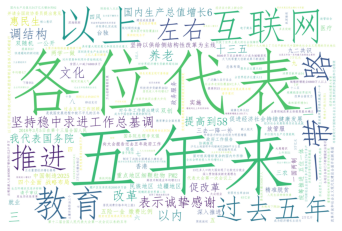

In [4]:
import os
print(os.getcwd())
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
mask=np.array(Image.open('DSC_0099.JPG'))
text=open('ZF2018.txt','r').read()
font=r'c:\Windows\Fonts\simfang.ttf'
wc=WordCloud(background_color='white',mask=mask,font_path=font,width=800,height=600).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('12_28.jpg')

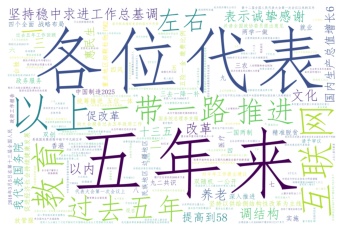

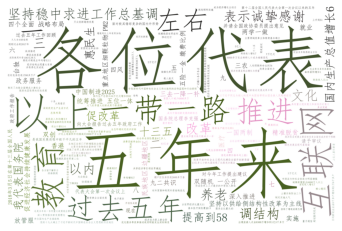

In [8]:
from PIL import Image
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
image_colors=ImageColorGenerator(mask)
mask=np.array(Image.open('DSC_0099.JPG'))
text=open('ZF2018.txt','r').read()
font=r'c:\Windows\Fonts\simfang.ttf'
wc=WordCloud(background_color='white',mask=mask,font_path=font,width=800,height=600).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis('off')
wc.to_file('12_28_1.jpg')

In [ ]:
## 分类预测

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
iris=datasets.load_iris()
data=iris.data
features=iris.feature_names
targets=iris.target
target_names=iris.target_names
features,data.shape,target_names,targets

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 (150, 4),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

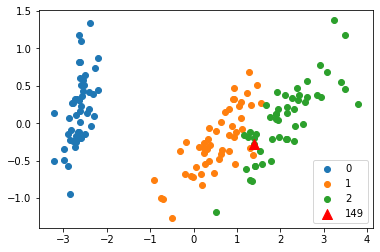

In [11]:
## 降维
from sklearn.decomposition import PCA
mypca=PCA(n_components=2)
datapca=mypca.fit_transform(data)

## 数据可视化
for i in range(3):
    plt.scatter(datapca[targets==i,0],datapca[targets==i,1],label=i)
plt.scatter(datapca[149,0],datapca[149,1],c='red',marker='^',s=100,label=149)
plt.legend()

In [13]:
## 决策树
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets as skds
matplotlib.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [14]:
buypcdata=pd.read_excel('成绩.xlsx')
print(buypcdata.shape)
buypcdata

(82, 17)


,id,cell_01,code_cell_01,valid_cell_01,line_01,cell_02,code_cell_02,valid_cell_02,line_02,cell_03,code_cell_03,valid_cell_03,line_03,cell_04,code_cell_04,valid_cell_04,line_04
0,3120105068,7.0,7.0,6.0,225.0,19.0,19.0,18.0,298.0,14.0,14.0,14.0,201.0,14.0,14.0,14.0,203.0
1,3120301259,21.0,21.0,20.0,163.0,25.0,24.0,22.0,162.0,27.0,26.0,25.0,204.0,19.0,19.0,18.0,191.0
2,3120332023,37.0,37.0,35.0,164.0,28.0,28.0,27.0,376.0,94.0,94.0,93.0,521.0,NaN,NaN,NaN,NaN
3,3120132004,37.0,37.0,36.0,171.0,26.0,26.0,25.0,368.0,57.0,57.0,56.0,250.0,NaN,NaN,NaN,NaN
4,3120118053,104.0,104.0,101.0,203.0,22.0,22.0,20.0,264.0,67.0,67.0,65.0,345.0,35.0,34.0,32.0,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,3120132011,37.0,37.0,35.0,172.0,27.0,25.0,24.0,351.0,94.0,94.0,93.0,524.0,29.0,29.0,28.0,376.0
78,3120305403,NaN,NaN,NaN,NaN,3.0,3.0,2.0,73.0,NaN,NaN,NaN,NaN,5.0,5.0,4.0,207.0
79,3120109017,37.0,30.0,19.0,112.0,12.0,10.0,3.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,20118038,NaN,NaN,NaN,NaN,38.0,38.0,26.0,372.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for line_01,line_02 in buypcdata.groupby('id'):
    print(line_01)
    print(line_02)

20118038
          id  cell_01  code_cell_01  valid_cell_01  line_01  cell_02  \
80  20118038      NaN           NaN            NaN      NaN     38.0   

    code_cell_02  valid_cell_02  line_02  cell_03  code_cell_03  \
80          38.0           26.0    372.0      NaN           NaN   

    valid_cell_03  line_03  cell_04  code_cell_04  valid_cell_04  line_04  
80            NaN      NaN      NaN           NaN            NaN      NaN  
3120101015
            id  cell_01  code_cell_01  valid_cell_01  line_01  cell_02  \
57  3120101015      7.0           7.0            6.0    131.0      5.0   

    code_cell_02  valid_cell_02  line_02  cell_03  code_cell_03  \
57           5.0            4.0    222.0      8.0           8.0   

    valid_cell_03  line_03  cell_04  code_cell_04  valid_cell_04  line_04  
57            7.0    278.0      4.0           4.0            3.0    230.0  
3120101016
            id  cell_01  code_cell_01  valid_cell_01  line_01  cell_02  \
74  3120101016      4.0    

In [19]:
## 信息熵
import math
def myentropy(df,targetCol):
    count=len(df)
    entropy=0
    for i in df[targetCol].value_counts():
        pi=i/count
        entropy -=pi*math.log(pi)
    return entropy
myentropy(buypcdata,'line_03')

3.9888849872338104

In [1]:
import random
def once(doors=3):   # 一次事件的模拟
    L=list(range(1,doors+1))
    car=random.choice(L)  # 一扇门后面停着汽车
    man=random.choice(L)  # 参赛者预先选择一扇门
    L.remove(man)  # 可选集合中去掉参赛者选择的门
    if car==man:
        host=random.choice(L)  # 当主持人知道参赛者选中，主持人随机选择不同于参赛者的一扇门
    else:
        L.remove(car)
        host=random.choice(L)  # 当主持人知道参赛者未选中，主持人随机选择不同于参赛者和中奖门的一扇门
    return car,man,host
stay_nums=0.0  # 坚持选择赢得汽车的次数
move_nums=0.0  # 改变选择赢得汽车的次数
host_nums=0.0  # 主持人选中次数
times=1000
for i in range(times):
    c,m,h=once()  # 主持人不知道门后的情况排除门
    if c==m:
        stay_nums +=1   # 坚持不变，中奖计数
    else:
        move_nums +=1
print('维持选择：',stay_nums/(times)*100,'%\n改变选择：',move_nums/(times-host_nums)*100,'%')

维持选择： 33.4 %
改变选择： 66.60000000000001 %


In [2]:
hypos=[1,2,3]
data={'man':2,'host':3}  # host表示主持人打开的门，man表示挑战者打开的门
probs={}  # 个假设的概率作为全局变量
def pre(hypos):
    count=len(hypos)
    for Hx in hypos:
        probs[Hx]=1.0/count
def LikeliHood(data,Hx):
    if Hx==data['host']:
        re=0
    elif Hx==data['man']:
        re=1.0/(len(hypos)-1)
    else:
        re=1.0/(len(hypos)-2)
    return re
def update(data,probs,hypos):
    for Hx in hypos:
        like=LikeliHood(data,Hx)
        probs[Hx]=probs[Hx]*like
def run(data,hypos):
    pre(hypos)
    update(data,probs,hypos)
    sum1=0.0
    for Hx,prob in probs.items():
        sum1+=prob
    for Hx,prob in probs.items():
        probs[Hx]=round(prob/sum1,2)
    return probs
run(data,hypos)

{1: 0.67, 2: 0.33, 3: 0.0}

In [4]:
hypos=range(1,100)   # 假设最多99辆火车
data=80   # 看到3辆火车
probs={}
def pre(Hx):   # 先验概率
    count=len(hypos)
    for Hx in hypos:
        probs[Hx]=1.0/count
def LikeliHood(data,Hx):
    if Hx<data:
        like=0
    else:
        like=1.0/Hx
    return like
def update(data,probs,hypos):
    for Hx in hypos:
        like=LikeliHood(data,Hx)
        probs[Hx]=probs[Hx]*like
def run(data,hypos):
    pre(hypos)
    update(data,probs,hypos)
    sum1=0.0
    for Hx,prob in probs.items():
        sum1 +=prob
    for Hx,prob in probs.items():
        probs[Hx]=round(prob/sum1,3)
    return probs
probs=run(data,hypos)
probs

{1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 0.0,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 0.0,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 0.0,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 0.0,
 73: 0.0,
 74: 0.0,
 75: 0.0,
 76: 0.0,
 77: 0.0,
 78: 0.0,
 79: 0.0,
 80: 0.056,
 81: 0.055,
 82: 0.054,
 83: 0.054,
 84: 0.053,
 85: 0.052,
 86: 0.052,
 87: 0.051,
 88: 0.051,
 89: 0.05,
 90: 0.05,
 91: 0.049,
 92: 0.048,
 93: 0.048,
 94: 0.047,
 95: 0.047,
 96: 0.046,
 97: 0.046,
 98: 

In [6]:
from scipy.special import comb
hypos=[1,2,3,4,5,6,7,8,9,10]
data={'man':2,'host':[3,4,5]}
probs={}
def pre(hypos):
    count=(len(hypos))
    for hypo in hypos:
        probs[hypo]=1.0/count
def LikeliHood(data,Hx):
    if Hx in data['host']:
        re=0
    elif Hx==data['man']:
        re=1/(9*8*7/3*2)
    else:
        re=1/(8*7*6/3*2)
    return re
def update(data,probs,hypos):
    for Hx in hypos:
        like=LikeliHood(data,Hx)
        probs[Hx]=probs[Hx]*like
def run(data,hypos):
    pre(hypos)
    update(data,probs,hypos)
    sum1=0.0
    for Hx,prob in probs.items():
        sum1+=prob
    for Hx,prob in probs.items():
        probs[Hx]=round(prob/sum1,2)
    return probs
run(data,hypos)

{1: 0.15,
 2: 0.1,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.15,
 7: 0.15,
 8: 0.15,
 9: 0.15,
 10: 0.15}

In [1]:
%%cmd
you-get https://www.bilibili.com/video/BV14T4y1N7wM

Microsoft Windows [版本 10.0.18363.1256]
(c) 2019 Microsoft Corporation。保留所有权利。

(base) C:\Users\25261\Python编程\代码作业>you-get https://www.bilibili.com/video/BV14T4y1N7wM
site:                Bilibili
title:               璋�鏅�-姊呴�欏�傛晠锛堝師鍞憋細姣涗笉鏄撱�佸懆娣憋級
stream:
    - format:        flv
      container:     flv
      quality:       楂樻竻 1080P
      size:          87.7 MiB (91937360 bytes)
    # download-with: you-get --format=flv [URL]

 100% ( 87.7/ 87.7MB) 鈹溾枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚枅鈻堚敜[1/1]  126 MB/sssssssssssssssssssss



(base) C:\Users\25261\Python编程\代码作业>

In [2]:
import altair as alt
from vega_datasets import data
source=alt.topo_feature(data.world_110m.url,'countries')
base=alt.Chart(source).mark_geoshape(
fill='#888888',
stroke='purple'
).properties(
width=300,
height=180
)
projections=['equirectangular','mercator','orthographic','gnomonic']
charts=[base.project(proj).properties(title=proj)
       for proj in projections]
alt.concat(*charts,columns=2)

alt.ConcatChart(...)